In [68]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [69]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [70]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:53,190  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:53,190  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:53,190  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps


2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:53,191  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:53,192  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-08-22 14:06:53,192  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-08-22 14:06:53,192  | py-experimenter - WARNING  | No values given for keyfield total_timesteps
2024-08-22 14:06:53,192  | py-experimenter - WARNING  | No values given for keyfield smac_budget
2024-08-22 14:06:53,192  | py-experimenter - INFO     | Found 13 keyfields
2024-08-22 14:06:53,192  | py-experimenter - INFO     | Found 2 resultfields
2024-08-22 14:06:53,193  | py-experimenter - INFO     | Found 5 logtables
2024-08-22 14:06:53,193  | py-experimenter - INFO     | Found logtable hpo_warmstart__configurations
2024-08-22 14:06:53,193  | py-experimenter - INFO     | Found logtable

In [71]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [72]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:53,755  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:53,756  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:53,757  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:53,757  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:53,757  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:53,831  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:53,981  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:54,067  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:54,069  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:54,070  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:54,072  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:54,073  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:54,074  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [73]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8800,8801,3,2024-07-10 23:25:26,2,38,None,50000,-0.979,0.979790
8801,8802,3,2024-07-10 23:25:26,2,38,None,100000,-0.593,0.905837
8802,8803,3,2024-07-10 23:25:26,2,38,None,150000,-0.694,1.092930
8803,8804,3,2024-07-10 23:25:26,2,38,None,200000,-0.196,0.972494
8804,8805,3,2024-07-10 23:25:26,2,38,None,250000,-0.493,1.014610
...,...,...,...,...,...,...,...,...,...
8895,8896,3,2024-07-10 23:29:45,4,38,None,800000,0.900,0.300000
8896,8897,3,2024-07-10 23:29:45,4,38,None,850000,0.900,0.300000
8897,8898,3,2024-07-10 23:29:45,4,38,None,900000,1.000,0.000000
8898,8899,3,2024-07-10 23:29:45,4,38,None,950000,0.800,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

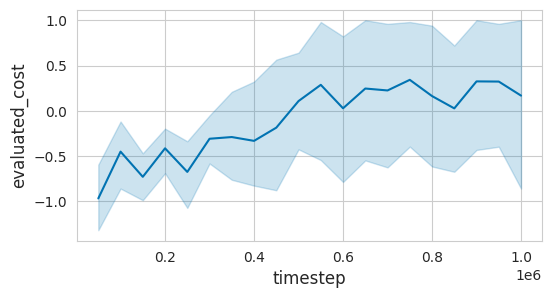

In [74]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

In [75]:
last_time_step_data = relevat_training_process_before_growth[relevat_training_process_before_growth["timestep"] == relevat_training_process_before_growth["timestep"].max()]
last_time_step_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8819,8820,3,2024-07-10 23:25:28,2,38,None,1000000,-0.595,0.908969
8839,8840,3,2024-07-10 23:26:23,1,38,None,1000000,-1.565,0.783163
8859,8860,3,2024-07-10 23:27:59,0,38,None,1000000,1.000,0.000000
8879,8880,3,2024-07-10 23:28:20,3,38,None,1000000,1.000,0.000000
8899,8900,3,2024-07-10 23:29:45,4,38,None,1000000,1.000,0.000000


# Add Grow Once Data

In [76]:
table_name = "net2deeper_grow_once"

In [77]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-08-22 14:06:54,565  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:54,565  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:54,565  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:54,565  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:54,566  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:54,637  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:54,783  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:54,876  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:54,877  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:54,879  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:54,880  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:54,881  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:54,882  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [78]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [79]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:55,137  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:55,138  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:55,139  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:55,139  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:55,139  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:55,209  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:55,355  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:55,442  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:55,443  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:55,445  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:55,446  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:55,448  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:55,449  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

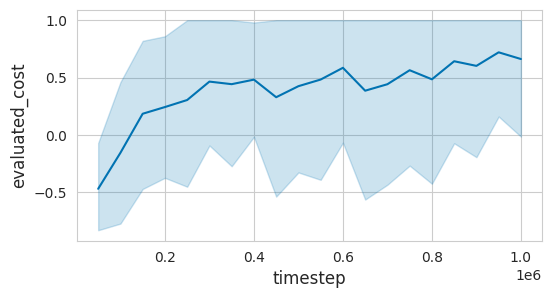

In [80]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-08-22 14:06:55,848  | py.warnings - WARNING  | /tmp/ipykernel_362868/3380021130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 14:06:55,848  | py.warnings - WARNING  | /tmp/ipykernel_362868/3380021130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-08-22 14:06

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

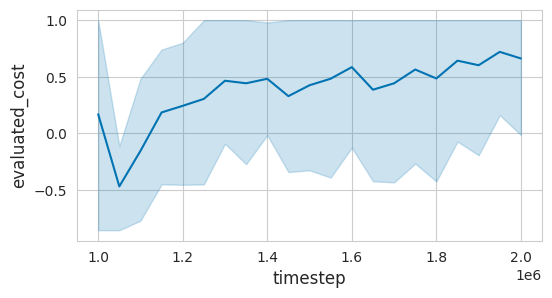

In [81]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([last_time_step_data, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline for 1 Layer at all times

In [82]:
table_name = "hpo_warmstart"

In [83]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 8]

2024-08-22 14:06:56,068  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:56,069  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:56,069  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:56,069  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:56,070  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:56,149  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:56,298  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:56,386  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:56,387  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:56,389  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:56,390  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:56,391  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:56,392  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [84]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [85]:
samc_cost_warmstarting_row

ID                                                                             152
experiment_id                                                                    8
timestamp                                                      2024-07-17 21:36:14
trial_number                                                                    36
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 128, 'ent_coef': 3.035832575602...
cost                                                                       -0.8006
Name: 85, dtype: object

In [86]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:56,656  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:56,657  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:56,658  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:56,658  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:56,658  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [87]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
8500,15181,8,2024-07-17 21:28:32,2,35,1000000,None,50000,-1.288,1.092500
8501,15182,8,2024-07-17 21:28:33,2,35,1000000,None,100000,-0.678,1.074520
8502,15183,8,2024-07-17 21:28:33,2,35,1000000,None,150000,-0.492,1.013050
8503,15184,8,2024-07-17 21:28:33,2,35,1000000,None,200000,-0.994,0.994054
8504,15185,8,2024-07-17 21:28:33,2,35,1000000,None,250000,-0.789,0.966400
...,...,...,...,...,...,...,...,...,...,...
8595,15276,8,2024-07-17 21:36:12,4,35,1000000,None,800000,1.000,0.000000
8596,15277,8,2024-07-17 21:36:12,4,35,1000000,None,850000,1.000,0.000000
8597,15278,8,2024-07-17 21:36:12,4,35,1000000,None,900000,1.000,0.000000
8598,15279,8,2024-07-17 21:36:12,4,35,1000000,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

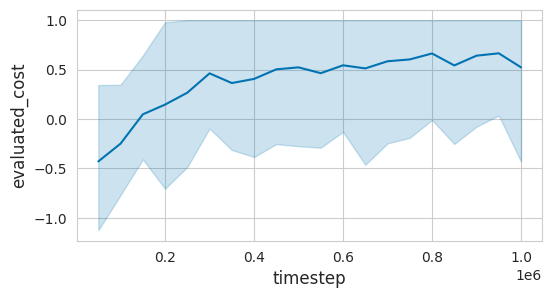

In [88]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 8) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

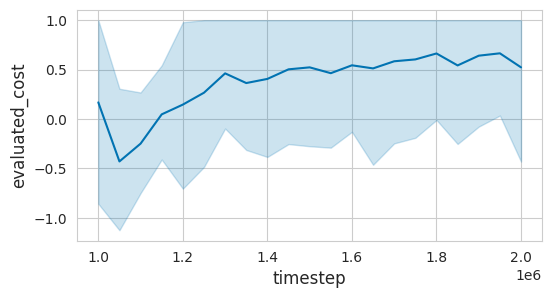

In [89]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([last_time_step_data, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Add Basleine For two Layers at all time

In [90]:
table_name_2_layer_initial = 'incumbent_gen_2_layers'
table_name_2_layer_warmstarting = 'hpo_warmstart_2_layers'

In [91]:
# Get SMAC Tables
smac_table_2_layer_initial = get_logtable(databse_name, table_name_2_layer_initial, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
smac_table_2_layer_warmstarting = get_logtable(databse_name, table_name_2_layer_warmstarting, "smac_callbacks", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:57,651  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:57,651  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:57,651  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:57,651  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:57,652  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:57,723  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:57,874  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:58,262  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:58,263  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:58,265  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:58,266  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:58,267  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:58,268  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [92]:
# Select incumbents
smac_table_2_layer_initial_relervant = smac_table_2_layer_initial[smac_table_2_layer_initial["experiment_id"] == 2]
smac_table_2_layer_warmstarting_relervant = smac_table_2_layer_warmstarting[smac_table_2_layer_warmstarting["experiment_id"] == 2]


In [93]:
smac_table_2_layer_initial_relervant

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,43,2,2024-07-17 09:47:49,1,None,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",1.0756
1,44,2,2024-07-17 09:58:55,2,None,"{'batch_size': 256, 'ent_coef': 0.074653743579...",1.3132
2,45,2,2024-07-17 10:12:03,3,None,"{'batch_size': 128, 'ent_coef': 0.244189932290...",1.2116
3,46,2,2024-07-17 10:48:06,4,None,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.7736
4,47,2,2024-07-17 11:28:20,5,None,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.7040
5,48,2,2024-07-17 11:40:15,6,None,"{'batch_size': 128, 'ent_coef': 0.108538198750...",1.1390
6,49,2,2024-07-17 11:51:56,7,None,"{'batch_size': 256, 'ent_coef': 0.210107968188...",1.9080
7,50,2,2024-07-17 12:04:13,8,None,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.8120
8,51,2,2024-07-17 12:19:04,9,None,"{'batch_size': 64, 'ent_coef': 0.2432073301635...",1.6744
9,52,2,2024-07-17 12:32:59,10,None,"{'batch_size': 256, 'ent_coef': 0.129933852609...",0.7080


In [94]:
smac_table_2_layer_initial_minimal_cost_row = smac_table_2_layer_initial_relervant.loc[smac_table_2_layer_initial_relervant["cost"].idxmin()]
smac_table_2_layer_warmstarting_minimal_cost_row = smac_table_2_layer_warmstarting_relervant.loc[smac_table_2_layer_warmstarting_relervant["cost"].idxmin()]

incumbent_trial_number_2_layer_initial = smac_table_2_layer_initial_minimal_cost_row["trial_number"] - 1
incumbent_trial_number_2_layer_warmstarting = smac_table_2_layer_warmstarting_minimal_cost_row["trial_number"] - 1

In [95]:
incumbent_trial_number_2_layer_warmstarting

39

In [96]:
# Extract Training process tables
training_process_2_layer_initial = get_logtable(databse_name, table_name_2_layer_initial, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")
training_process_2_layer_warmstarting = get_logtable(databse_name, table_name_2_layer_warmstarting, "training_process", "baselines/minihack/blackbox_warmstart_hpo_1_layer/config/hpo_warmstart.yaml")

2024-08-22 14:06:59,103  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-22 14:06:59,104  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-22 14:06:59,105  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-22 14:06:59,105  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-22 14:06:59,176  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-22 14:06:59,329  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-22 14:06:59,418  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-22 14:06:59,419  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-22 14:06:59,420  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-22 14:06:59,421  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-22 14:06:59,423  | py-experimenter - INFO     | Closing all open connections...
2024-08-22 14:06:59,424  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [97]:
# Extract relevant training process
training_process_2_layer_initial_relevant = training_process_2_layer_initial[(training_process_2_layer_initial["experiment_id"] == 2) & (training_process_2_layer_initial["trial_number"] == incumbent_trial_number_2_layer_initial)]
training_process_2_layer_warmstarting_relevant = training_process_2_layer_warmstarting[(training_process_2_layer_warmstarting["experiment_id"] == 2) & (training_process_2_layer_warmstarting["trial_number"] == incumbent_trial_number_2_layer_warmstarting)]

# Combine the two dataframes
training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"].max()
combined_2_layer = pd.concat([training_process_2_layer_initial_relevant, training_process_2_layer_warmstarting_relevant])

2024-08-22 14:07:00,181  | py.warnings - WARNING  | /tmp/ipykernel_362868/3498104734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"].max()

2024-08-22 14:07:00,181  | py.warnings - WARNING  | /tmp/ipykernel_362868/3498104734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_process_2_layer_warmstarting_relevant["timestep"] += training_process_2_layer_initial_relevant["timestep"]

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

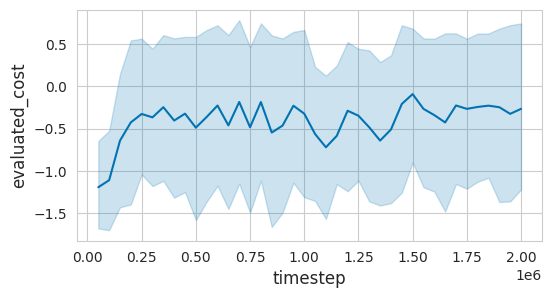

In [98]:
# Plot the combined dataframes
sns.lineplot(data=combined_2_layer, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

In [99]:
from utils.plotting import training_process_style

<Figure size 600x300 with 0 Axes>

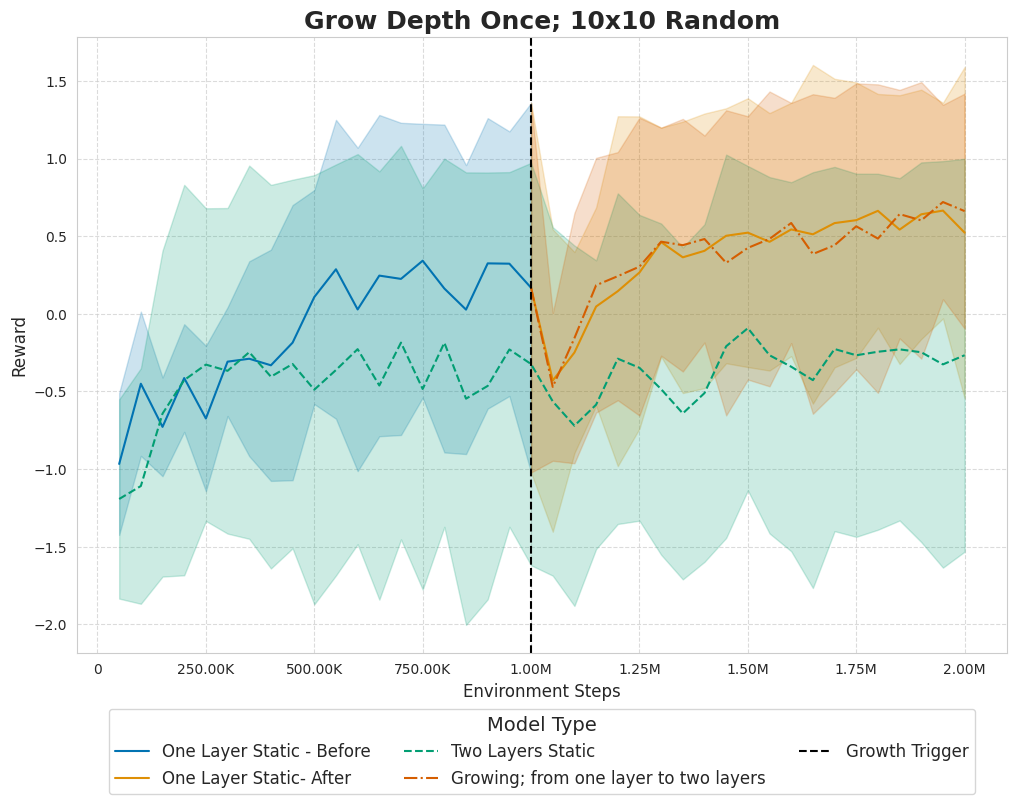

In [102]:
training_process_style()
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost", label="One Layer Static - Before", errorbar="sd")
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="One Layer Static- After", errorbar="sd")
sns.lineplot(data=combined_2_layer, x="timestep", y="evaluated_cost", label="Two Layers Static", linestyle="--", errorbar="sd")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="Growing; from one layer to two layers", linestyle="-.", errorbar="sd")
plt.axvline(x=1000000, color="black", linestyle="--", label = "Growth Trigger")
plt.xlabel("Environment Steps")
plt.ylabel("Reward")
plt.legend(title="Model Type", fontsize=12, title_fontsize=14, loc="center", bbox_to_anchor=(0.5, -0.16), ncol=3)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Grow Depth Once; 10x10 Random", fontsize=18, fontweight="bold")
plt.savefig("plotting/minihack/grow_depth_once/grow_once_10x10_random.png", bbox_inches="tight")